![](../../images/header.png)

# Redshift and Distances
<h6>
Author: Simon Bouchard

Last Updated: October 1, 2025
</h6>

> Note : Notebooks links are placeholders and will be updated when the notebooks are available.

In this notebook, we will 

By the end of this notebook, you should be able to:
- Understand the concept of redshift and its significance in cosmology
- Determine a redshift from observed and emitted spectra
- Calculate distances using redshift in a cosmological context

## Preferred Backgrounds
While not necessary, having knowledge about the following topics will be helpful in completing this notebook on time:
- Basic algebra and geometry
- Basic understanding of waves properties (wavelength, frequency, speed) and the relationship between them
- Basic understanding of light and electromagnetic spectrum
- What is a spectrum and how to read it

In [33]:
# Run this cell to load the basic Python packages we need to run this notebook
import numpy as np
import matplotlib.pyplot as plt

## 1 - From Doppler to Redshift

### 1.1 - Cars and Sirens

The *Doppler effect* is the change in frequency (or wavelength) of a wave in relation to an observer who is moving relative to the wave source (or vice versa). You might have already encountered it, for example when an ambulance passes by with its siren on. As the ambulance approaches, the sound waves are compressed, leading to a higher pitch. As it moves away, the sound waves are stretched out, resulting in a lower pitch.

<audio controls="controls">
  <source type="audio/ogg" src="https://upload.wikimedia.org/wikipedia/commons/9/90/Speeding-car-horn_doppler_effect_sample.ogg"></source>
  <p>Your browser does not support the audio element.</p>
</audio>

The frequency heard by the observer can be calculated using the formula:
$$f_{obs} = \frac{1}{1 + v/c} * f$$
where:
- $f_{obs}$ is the frequency received by an observer that *does not moves*
- $f$ is the frequency emitted by a source that moves at speed $v$ relative to the observer
- $c$ is the speed of the wave in the medium (for sound in air, it's approximately 340 m/s)

> 🤓☝️ If the source goes towards the observer, its speed has to be negative ! 
> Also, if the observer moves, the formula is more complex, as we need to account for the observer's velocity as well.

*Can you give an example of a real-life object that uses the Doppler effect?*

<details>
<summary>Click to see the answer</summary>

> 🚓 A radar used by police to measure the speed of moving vehicles uses the Doppler effect. It emits a radio wave towards the vehicle, and the frequency of the reflected wave changes based on the speed of the vehicle (as each successive wave has to catch up with the vehicle). By measuring this change in frequency, the radar can calculate the speed of the vehicle.

</details>

*Can you think of an example where we need to account for the Doppler effect?*
<details>
<summary>Click to see the answer</summary>

> 🪐 In 2005, the European Space Agency's *Huygens* probe landed on Titan, Saturn's largest moon. The probe transmitted data back to NASA's *Cassini* orbiter, which then relayed the information to Earth. Due to the relative motion between Huygens and Cassini (and the Doppler effect), the frequency of the radio signal was too big, and could not be read by Cassini's systems - causing the signal on Earth to be unreadable. To solve this issue, the trajectory of Cassini was altered to reduce the velocity of the orbiter relative to Huygens, allowing the signal to be properly received. <small>(Read the more detailed explanation [here](https://www.thespacereview.com/article/306/1))</small>
>
> 🛰️ More generally, most of the satellites orbiting the Earth need to account for the Doppler effect when communicating with ground stations, as their high speeds can cause significant frequency shifts in the signals they send and receive.

</details>

**Let's create a function that encodes the Doppler effect formula for a sound wave.** This function will take as input the source frequency, the speed of the source, and the speed of the observer, and will return the observed frequency.

In [8]:
def add_doppler(f, v, c=340):
    f_obs = ...
    return f_obs

# FIXME: Soln to be removed
def add_doppler(f, v, c=340):
    f_obs = f / (1 - v/c)
    return f_obs

**What would be the frequency of a 440 Hz sound wave (the musical note A4) emitted by a source moving away from an observer at 30 m/s?** Assume the speed of sound in air is approximately 340 m/s. Is the pitch higher or lower than 440 Hz?

In [ ]:
sound = ...

# FIXME: Soln to be removed
sound = add_doppler(f=440, v=30)

print(f"The observed frequency is {sound:.2f} Hz")

The observed frequency is 482.58 Hz


**Now what happens if the source moves towards the observer at 30 m/s?** (Hint: the speed of the source should be negative in this case !)

In [ ]:
sound = ...

# FIXME: Soln to be removed
sound = add_doppler(440, -30)

print(f"The observed frequency is {sound:.2f} Hz")

The observed frequency is 404.32 Hz


Let's compute the frequency of an object that passes in front of us. Its speed relative to us will decrease, then increase once it has passed us. We can simulate this by computing the frequency at different speeds, from -100 m/s to 100 m/s.

**Plot the frequency as a function of the speed of the source.** Use `np.linspace` to create an array of speeds, then compute the corresponding frequencies using the `add_doppler` function. What do you observe?

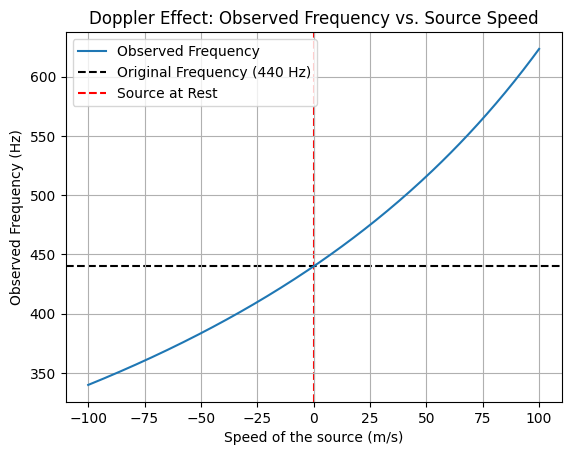

In [ ]:
# speeds = ...
# frequencies = ...
# plt.plot(..., ..., label='Observed Frequency')

# FIXME: Soln to be removed
speeds = np.linspace(-100, 100, 200)
frequencies = add_doppler(440, speeds)
plt.plot(speeds, frequencies, label='Observed Frequency')

plt.axhline(440, color='k', linestyle='--', label='Original Frequency (440 Hz)', zorder=-1)
plt.axvline(0, color='r', linestyle='--', label='Source at Rest', zorder=-1)
plt.xlabel("Speed of the source (m/s)")
plt.ylabel("Observed Frequency (Hz)")
plt.title("Doppler Effect: Observed Frequency vs. Source Speed")
plt.legend()
plt.grid()

### 1.2 - Light and Redshift

But the Doppler effect is not limited to sound waves; it also applies to electromagnetic waves, including light.

Since the frequency and wavelength of a wave are related by the equation $c = \lambda f$ (with $c$ being the speed of light, $\lambda$ the wavelength, and $f$ the frequency), we can rewrite the Doppler effect formula in terms of wavelength:
$$\lambda_{obs} = (1 + v/c) * \lambda$$
where:
- $\lambda_{obs}$ is the wavelength received by an observer that moves at speed $v_{obs}$
- $\lambda$ is the wavelength emitted by a source that moves at speed $v$
- $c$ is the speed of the wave in the medium (for light in vacuum, it's approximately $3 \times 10^8$ m/s)

🤓☝️ If the source moves really fast, the formula becomes the "Relativistic Doppler Effect":
$$\lambda_{obs} = \sqrt{\frac{1 + v/c}{1 - v/c}} * \lambda$$

Here is a spectrum (see our [Galaxy Spectra notebook](GalaxySpectra.ipynb)) of the light emitted by a stationary source (in blue), and the same spectrum as observed by an observer moving away from the source at $0.3c$ (in orange):

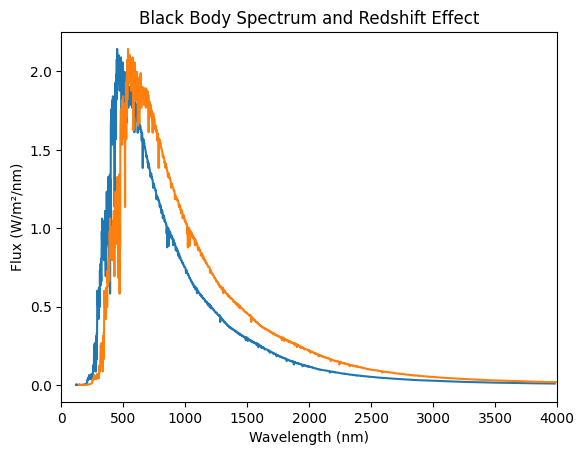

In [147]:
black_body = np.genfromtxt("../../data/black_body.csv", delimiter=",", names=True)
wavelength = black_body['wavelength_nm']
shifted_wavelength = black_body['shifted_wavelength_nm']
flux = black_body['flux_Wm2nm1']

plt.plot(wavelength, flux, label='Black Body Spectrum', color='C0')
plt.plot(shifted_wavelength, flux, label='Shifted Spectrum', color='C1')
plt.xlim(0, 4000)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Flux (W/m²/nm)")
plt.title("Black Body Spectrum and Redshift Effect");

In the context of light, the Doppler effect causes the observed wavelength of light from a moving source to shift, which means the color of the light changes depending on the speed of the source relative to the observer !

If the source is moving towards the observer, the light is shifted to shorter wavelengths, called a "blue-shift". If the source is moving away, the light is shifted to longer wavelengths, called a "red-shift".

#### Is this the Redshift we are looking for?

Well... Not really. In 1914, *Vesto Slipher* observed that the spectral lines of most galaxies were shifted towards the red end of the spectrum. This was a surprising discovery, as it suggested that these galaxies were moving away from us at high speeds.

Moreover, in the 1920s, *Edwin Hubble* found a relationship between the distance of galaxies and their redshift, now known as Hubble's Law. This law states that the farther away a galaxy is, the faster it appears to be moving away from us.

So, either Earth is a big galaxy repeller (which would not be coherent with the hypothesis that the laws of the universe are the same everywhere), or all the galaxies are moving away from each other ! This "Cosmic Expansion" is actually due to the expansion of space itself, and not because galaxies are moving through space, as demonstrated by *Alexander Friedmann* with the help of *Albert Einstein's* equations.

So instead of measuring a Doppler red-shift due to the motion of galaxies through space, we measure a "*Cosmological Redshift*" due to the expansion of space itself, that stretches the wavelength of light as it travels through the expanding universe !

This redshift is quantified by the parameter $z$, defined as:
$$ 1+z = \frac{\lambda_{obs}}{\lambda} = \sqrt{\frac{1 + v/c}{1 - v/c}} $$

> 🤓☝️ The [actual origin of the cosmological redshift](https://arxiv.org/abs/0808.1081) is not so simple, but this explanation is a good start ! 
> Also, the true calculation of redshift can be more complex, taking into account factors like the curvature of space-time and the expansion history of the universe.

**Let's implement a redshift function**, that takes as input the emitted wavelength and the observed wavelength, and returns the redshift $z$.

In [148]:
def redshift(l_obs, l):
    z = ...
    return z

# FIXME: Soln to be removed
def redshift(l_obs, l):
    z = (l_obs) / l - 1
    return z

## 2 - Measuring Redshift with galaxy spectra

Now, let's look at a galaxy spectrum from DESI Data Release 1 (DR1). The spectrum shows the intensity of light received from the galaxy at different wavelengths. You can see several peaks in the spectrum, which correspond to specific emission lines from elements in the galaxy.

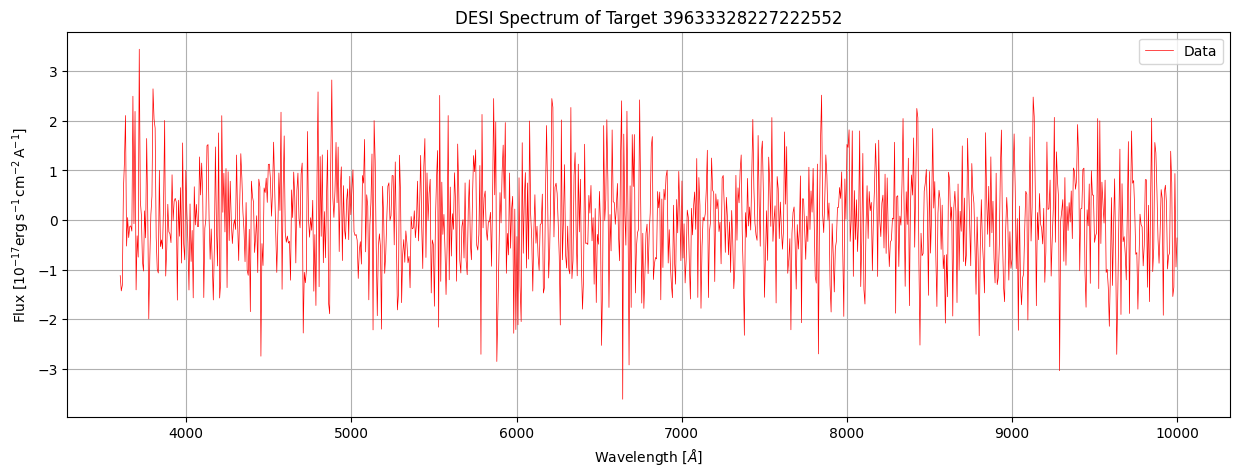

In [149]:
# TODO: Replace this with an actual DESI spectrum
data_wavelengths = np.linspace(3600, 10000, 1000)  # Angstroms
data_flux = np.random.normal(size=data_wavelengths.shape)  # Simulated data

plt.figure(figsize=(15, 5))
plt.plot(data_wavelengths, data_flux, color='red', lw=0.5, label='Data')

plt.xlabel(r"Wavelength [$\AA$]")
plt.ylabel(r"Flux [$10^{-17} \mathrm{erg} \, \mathrm{s}^{-1} \, \mathrm{cm}^{-2} \, \mathrm{A}^{-1}$]")
plt.title("DESI Spectrum of Target 39633328227222552")
plt.legend(loc='upper right')
plt.grid()

Here is what this redshift *should* look like if we recreate it in a lab (either experimentally or with a theoretical model). The emitted wavelength of the OII line is 372.7 nm (or 3727 Å). In the observed DESI spectrum, this line appears at a longer wavelength, indicating a redshift.

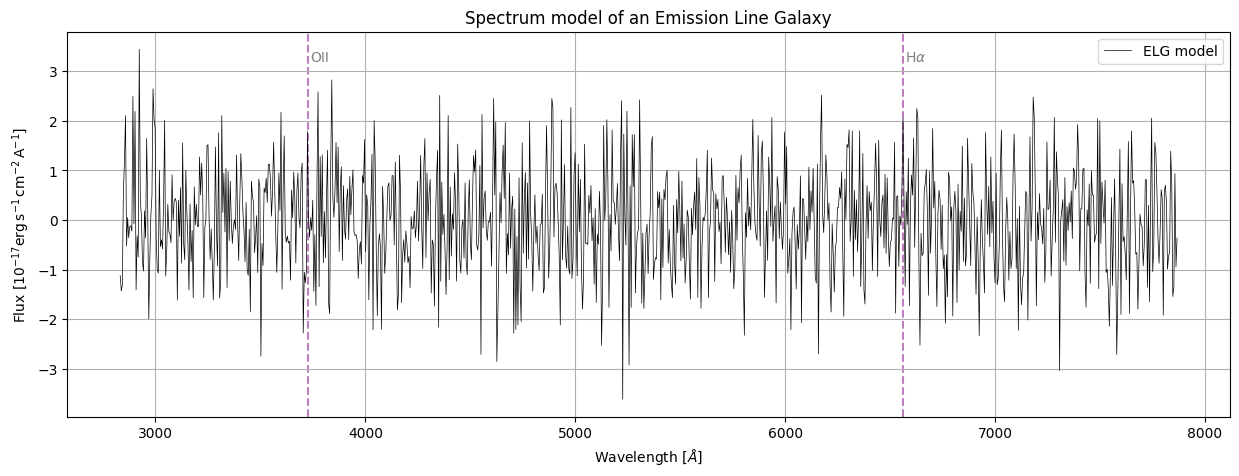

In [150]:
# TODO: Replace this with an actual model spectrum (DESI fit ?)
model_wavelengths = np.linspace(3600, 10000, 1000)/(1+0.2711)  # Angstroms
model_flux = data_flux  # Simulated model
Hline = 6563
OIIline = 3727

plt.figure(figsize=(15, 5))
plt.plot(model_wavelengths, model_flux, color='black', lw=0.5, label='ELG model')

plt.axvline(Hline, color='purple', linestyle='--', zorder=-1, alpha=0.5)
plt.axvline(OIIline, color='purple', linestyle='--', zorder=-1, alpha=0.5)
plt.text(Hline + 10, 3.2, r'H$\alpha$', color='gray')
plt.text(OIIline + 10, 3.2, r'OII', color='gray')

plt.xlabel(r"Wavelength [$\AA$]")
plt.ylabel(r"Flux [$10^{-17} \mathrm{erg} \, \mathrm{s}^{-1} \, \mathrm{cm}^{-2} \, \mathrm{A}^{-1}$]")
plt.title("Spectrum model of an Emission Line Galaxy")
plt.legend(loc='upper right')
plt.grid()

Can you identify the observed wavelength of the OII line in the DESI spectrum above? 

> You can look at a specific part of the spectrum by adding `plt.xlim(x1, x2)` to the plotting code, where `x1` and `x2` are the limits of the x-axis you want to see.

**Using this information, compute the redshift $z$ of the galaxy.**

In [151]:
lambda_observed = ... # in Angstroms
z = ...

# FIXME: Soln to be removed
lambda_observed = 4737.355 # in Angstroms
z = redshift(lambda_observed, OIIline)

print(f"The redshift z of the galaxy is: {z:.4f}")

The redshift z of the galaxy is: 0.2711


Let's check that we have the correct redshift ! Since we know that the redshift is basically a factor on the theoritical wavelength, we can simply multiply the emitted wavelength by (1 + z) to match the observed wavelength. 

**Multiply the theoritical wavelength of our model by the redshift factor you just computed and plot the result above the observed spectrum.**

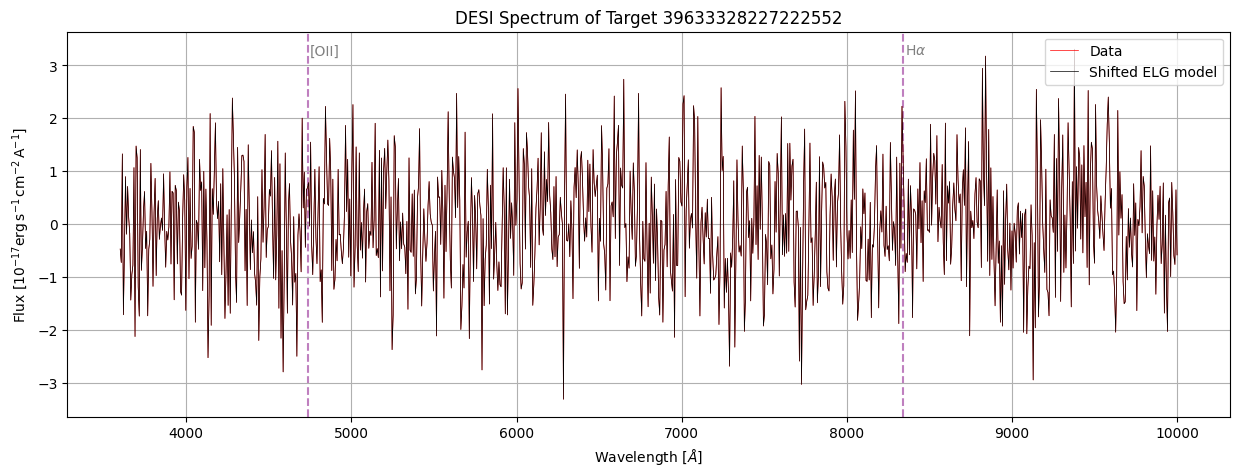

In [ ]:
shifted_OII = ...
shifted_Halpha = ...
shifted_model_wavelengths = ...

# FIXME: Soln to be removed
shifted_OII = OIIline * (1 + z)
shifted_Halpha = Hline * (1 + z)
shifted_model_wavelengths = model_wavelengths * (1 + z)

plt.figure(figsize=(15, 5))
plt.plot(data_wavelengths, data_flux, color='red', lw=0.5, label='Data')
# plt.plot(..., ..., color='black', lw=0.5, label='Shifted ELG model')

# FIXME: Soln to be removed
plt.plot(shifted_model_wavelengths, model_flux, color='black', lw=0.5, label='Shifted ELG model')

plt.axvline(shifted_Halpha, color='purple', linestyle='--', zorder=-1, alpha=0.5)
plt.axvline(shifted_OII, color='purple', linestyle='--', zorder=-1, alpha=0.5)
plt.text(shifted_Halpha + 10, 3.2, r'H$\alpha$', color='gray')
plt.text(shifted_OII + 10, 3.2, r'[OII]', color='gray')

plt.xlabel(r"Wavelength [$\AA$]")
plt.ylabel(r"Flux [$10^{-17} \mathrm{erg} \, \mathrm{s}^{-1} \, \mathrm{cm}^{-2} \, \mathrm{A}^{-1}$]")
plt.title("DESI Spectrum of Target 39633328227222552")
plt.legend(loc='upper right')
plt.grid()

Is the model a good fit to the data ? 

You can take a look at the other spectra at https://www.legacysurvey.org/viewer/desi-dr1 (click on any circled object) and check their redshift values in the table below the graph. Try to change the redshift value. How does the model change ?

## 3 - Measuring Distances with Redshifts

The relationship between the speed of a galaxy and its distance from us is given by Hubble's Law:
$$ v = H_0 \times D $$
with $H_0$ being the "Hubble constant", which quantifies the rate of expansion of the universe. Its value is approximately 70 km/s/Mpc (kilometers per second per megaparsec), although there is some debate about its exact value.

Since we can measure the redshift $z$ of a galaxy, we can estimate its velocity $v$ using the relativistic Doppler effect formula. To simplify the calculation, we can assume $v << c$, which gives us:
$$ z \approx \frac{v}{c} $$

**Implement a function that computes the distance of a galaxy given its redshift $z$.** You can use the value of $H_0 = 70$ km/s/Mpc and the speed of light $c = 3 \times 10^5$ km/s.

In [65]:
def distance(z, H0=70, c=3e5):
    d = ...
    return d

# FIXME: Soln to be removed
def distance(z, H0=70, c=3e5):
    v = c * z
    d = v / H0
    return d

Now, using the redshift $z$ you computed earlier for the galaxy in the DESI spectrum, **calculate its distance from us**.

In [71]:
D = ...

# FIXME: Soln to be removed
D = distance(z)

print(f"The distance D of the galaxy is: {D:.2f} Mpc")

The distance D of the galaxy is: 1161.82 Mpc


Though it's more common to express distances in megaparsecs (Mpc) in cosmology because of their scales, we can also compute it in light-years or in km. 1 Mpc is approximately $3.26$ million light-years. 1 Mpc is also equivalent to about $3.09 \times 10^{19}$ km.

**What is the distance of the galaxy in light-years? And in kilometers?**

In [70]:
D_ly = ...
D_km = ...

# FIXME: Soln to be removed
D_km = D * 3.09e19  # Convert Mpc to km
D_ly = D * 3.26e6   # Convert Mpc to light-years

print(f"The distance D of the galaxy is: {D_ly:.2e} light-years")
print(f"The distance D of the galaxy is: {D_km:.2e} kilometers")

The distance D of the galaxy is: 3.79e+09 light-years
The distance D of the galaxy is: 3.59e+22 kilometers


> 🤓☝️ The method we used here to compute the distances approximates a lot of complex factors, and while it provides a useful estimate, it may not capture all the nuances of cosmic expansion. Check out the [Measuring Distances in Cosmology](DistanceMeasures.ipynb) notebook for a more in-depth discussion on this topic.

In practice, we often measure the redshift $z$ of a galaxy to estimate its distance $D$. Conversely, if we have distance measurements from another method (see the [Distances Measurement notebook](DistanceMeasures.ipynb)), we can use them to infer the Hubble parameter $H_0$ by rearranging Hubble's Law:$$ H_0 = \frac{zc}{D} $$

Other methods estimate $H_0$ from measurements of the early universe (like the Cosmic Microwave Background) and return a value of $H_0$ that is significantly different from the one obtained from the measurements of the local universe (using redshifts and distances of supernovae).
This discrepancy, called "Hubble tension" (the two measurements differ by about 9% !) is an active area of research in cosmology !

## Conclusion

In this notebook, we explored the concept of redshift and its significance in cosmology. We learned how to determine a redshift from observed and emitted spectra, and how to calculate distances using redshift in a cosmological context. Now that we know how to measure distances from the spectra of galaxies, we can use this information to map the large-scale structure of the universe, study the distribution of galaxies, and understand the expansion history of the cosmos.

If you want to dive into the more complex distances computations that take the universe expansion and observational effects into account, you can check our notebook on [Measuring Distances in Cosmology](DistanceMeasures.ipynb) !

![](../../images/footer.png)

<details>
  <summary><h6>Code solutions, do not open if not allowed</h6></summary>

**Exercise 1 - Create a function that encodes the Doppler effect formula for a sound wave**
```python
def add_doppler(f, v, c=340):
    f_obs = f / (1 - v/c)
    return f_obs
```

**Exercise 2 - Frequency of a 440 Hz sound wave emitted by a source moving away from an observer at 30 m/s**
```python
sound = add_doppler(f=440, v=30)
```

**Exercise 3 - Frequency of a 440 Hz sound wave emitted by a source moving towards an observer at 30 m/s**
```python
sound = add_doppler(f=440, v=-30)
```

**Exercise 4 - Plot the frequency as a function of the speed of the source**
```python
speeds = np.linspace(-100, 100, 200)
frequencies = add_doppler(440, speeds)
plt.plot(speeds, frequencies, label='Observed Frequency')
```

**Exercise 5 - Implement a redshift function**
```python
def redshift(l_obs, l):
    z = (l_obs) / l - 1
    return z
```

**Exercise 6 - Compute the redshift z of the galaxy**
```python
lambda_observed = 4737.355 # in Angstroms
z = redshift(lambda_observed, OIIline)
```

**Exercise 7 - Multiply the theoritical wavelength of our model by the redshift factor you just computed and plot the result above the observed spectrum.**
```python
shifted_OII = OIIline * (1 + z)
shifted_Halpha = Hline * (1 + z)
shifted_model_wavelengths = model_wavelengths * (1 + z)
plt.plot(shifted_model_wavelengths, model_flux, color='black', lw=0.5, label='Shifted ELG model')
```

**Exercise 8 - Implement a function that computes the distance of a galaxy given its redshift z**
```python
def distance(z, H0=70, c=3e5):
    v = c * z
    d = v / H0
    return d
```

**Exercise 9 - Calculate the distance of the galaxy from us**
```python
D = distance(z)
```

**Exercise 10 - Distance of the galaxy in light-years and in kilometers**
```python
D_km = D * 3.09e19  # Convert Mpc to km
D_ly = D * 3.26e6   # Convert Mpc to light-years
```
</details>